# Community detection for SA network

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from demon import Demon
from community import community_louvain
from networkx.algorithms.community import k_clique_communities

In [2]:
G = nx.read_gexf('SA.gexf')

In [3]:
nodes_df = pd.DataFrame.from_dict(data=dict(G.nodes(data=True)), orient='index')
nodes_df

,sector,market_cap,ebitda,label
ARNA,Healthcare,5763631104,-541788992,ARNA
STLD,Basic Materials,14363883520,4648757760,STLD
X,Basic Materials,8431269376,5389000192,X
FB,Communication Services,521496559616,54720000000,FB
GRPN,Communication Services,502526784,54038000,GRPN
...,...,...,...,...
WERN,Industrials,2851277824,572675904,WERN
MSN,Technology,15209664,-3468500,MSN
SAVA,Healthcare,1422597248,-20826000,SAVA
DRRX,Healthcare,136503600,-35900000,DRRX


In [4]:
#pos = nx.spring_layout(G)

In [5]:
demon_communities = Demon(graph=G, epsilon=0.25, min_community_size=3).execute()

Exec: 100%|████████████████████████

Time:  'execute' 0.47 sec
------------------------------------


In [6]:
node_to_com = {node: None for node in G.nodes()}
max_demon_com = 0
demon_com_size_total = 0
demon_coms = len(demon_communities)
for i, com in enumerate(demon_communities):
    com_len = len(com)
    if com_len > max_demon_com:
        max_demon_com = com_len
    demon_com_size_total += com_len
    for node in com:
        node_to_com[node] = i+1
nx.set_node_attributes(G, node_to_com, 'demon_community')

In [7]:
k_cliqs = k_clique_communities(G, 3)

In [8]:
cliq_size_total = 0
cliqs = 0
k_cliq_comms = []
max_cliq = 0
for cliq in k_cliqs:
    if len(cliq) > max_cliq:
        max_cliq = len(cliq)
    k_cliq_comms.append(list(cliq))
    cliq_size_total += len(cliq)
    cliqs += 1
mean_cliq_size = cliq_size_total / cliqs
k_cliq_comms = sorted(k_cliq_comms, key=len, reverse=True)
demon_communities = sorted(demon_communities, key=len, reverse=True)

In [9]:
louvain_comms = community_louvain.best_partition(G)
nx.set_node_attributes(G, louvain_comms, 'louvain_community')

In [10]:
def plot_sector_value_counts(nodes_df, subset=None):
    subset = nodes_df.index if subset is None else subset
    nodes_df.loc[subset]['sector'].value_counts().plot(kind='barh')

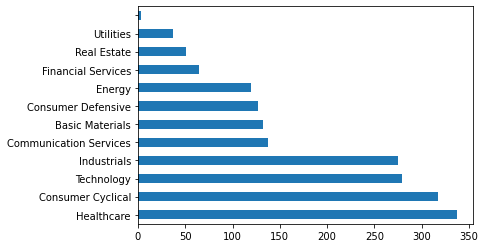

In [11]:
plot_sector_value_counts(nodes_df, None)